# Machine Learning (Mini Project) :-
## Online Payment Fraud Detection :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
import time
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\onlinefraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtype =='object':
        df[i] = lab.fit_transform(df[i])

In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


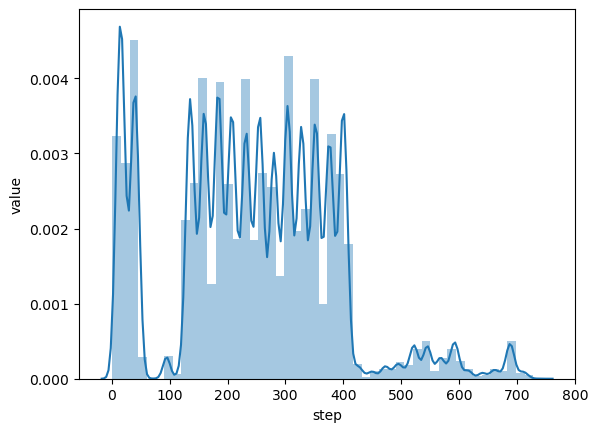

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


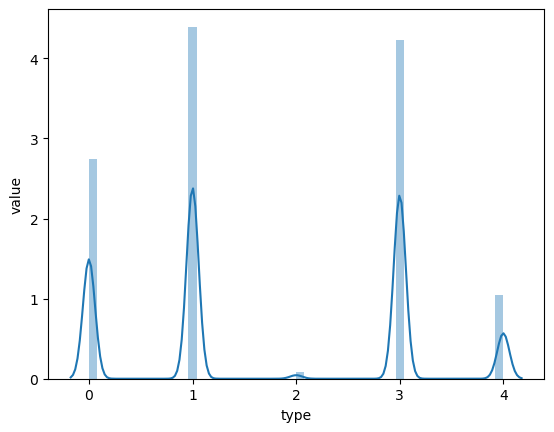

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


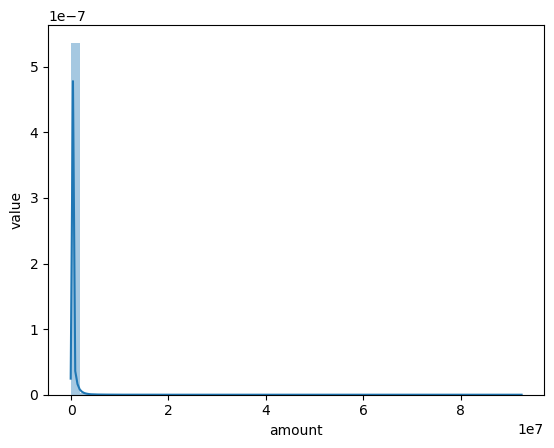

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


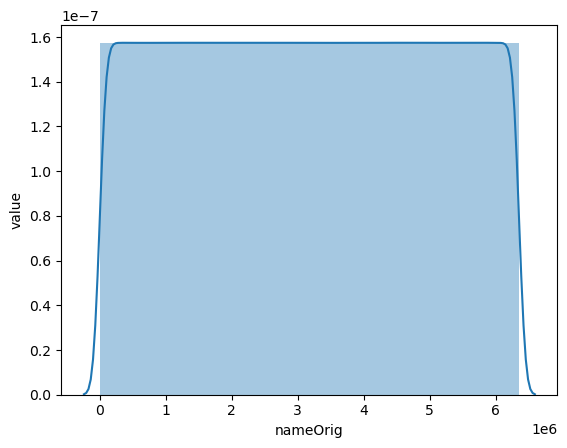

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


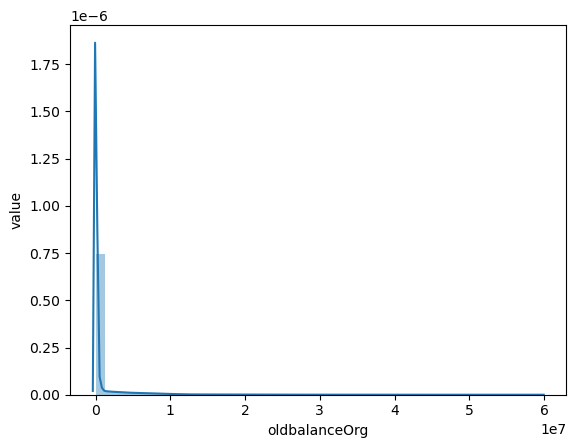

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


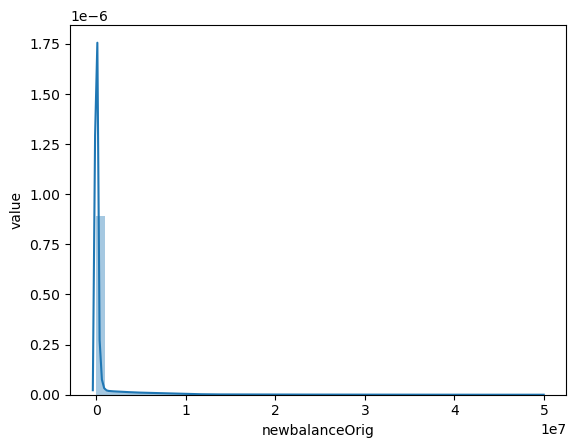

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


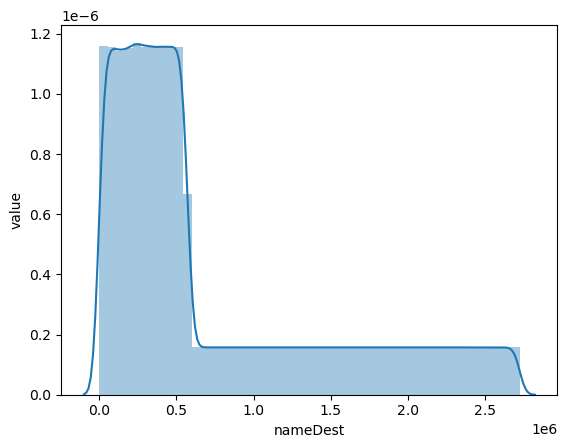

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


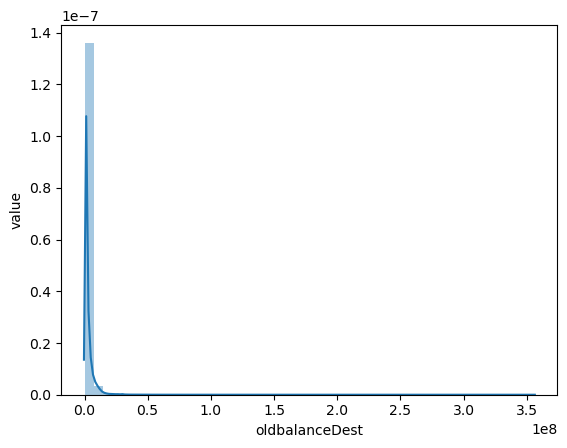

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


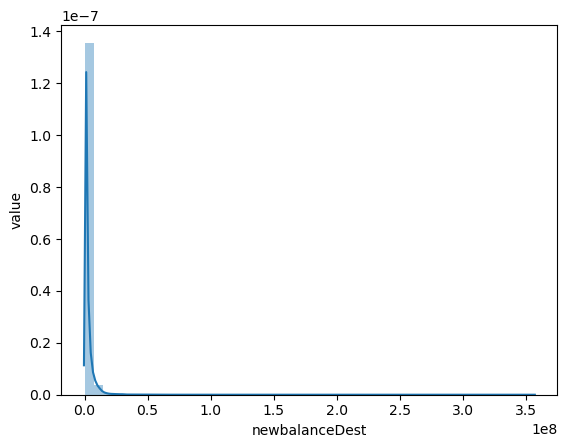

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


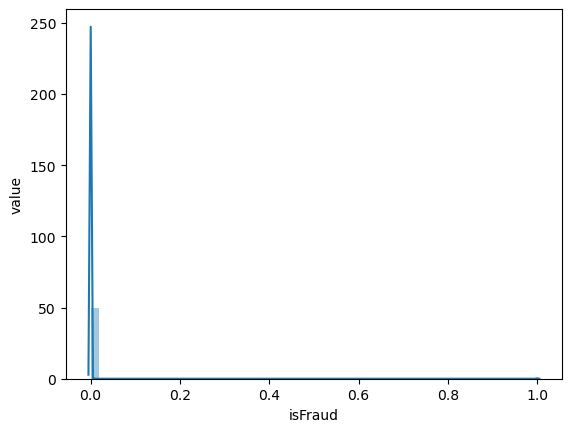

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


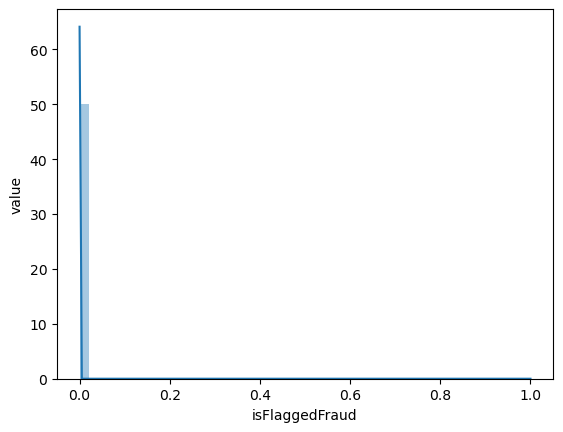

In [10]:
for d in df.columns:
    sns.distplot(df[d])
    plt.xlabel(d)
    plt.ylabel('value')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


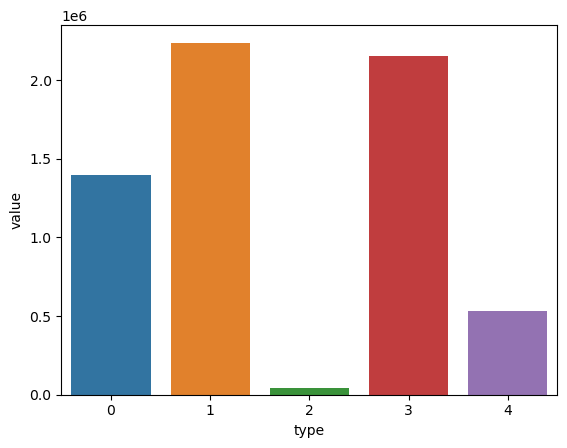

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


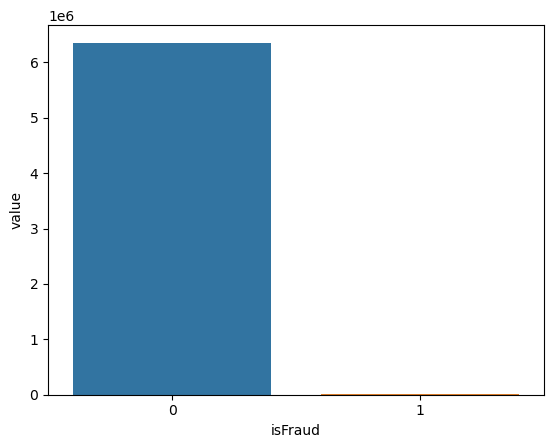

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


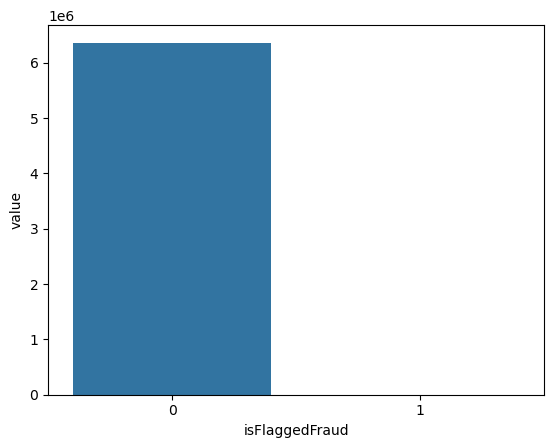

In [11]:
lis = df[['type','isFraud','isFlaggedFraud']]
for l in lis.columns:
    sns.countplot(lis[l])
    plt.xlabel(l)
    plt.ylabel('value')
    plt.show()

## Outlier Detection :

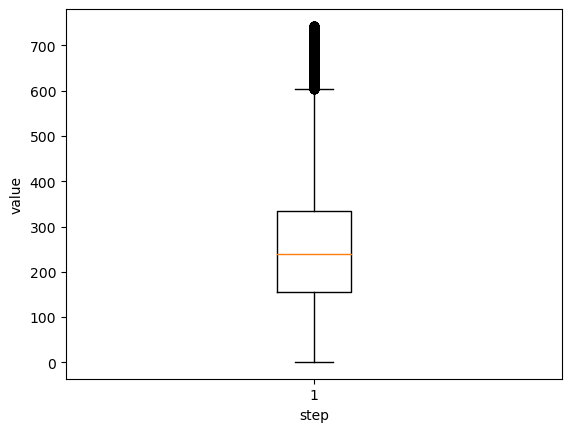

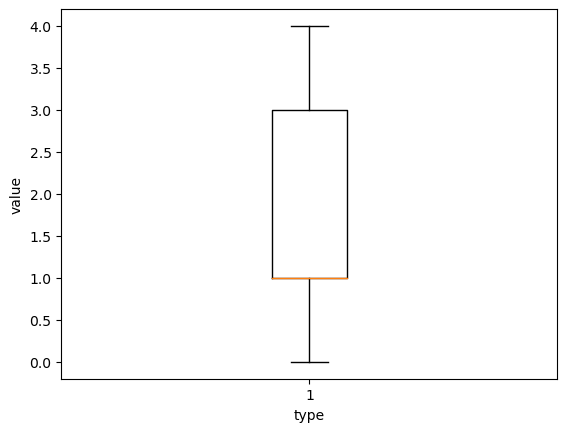

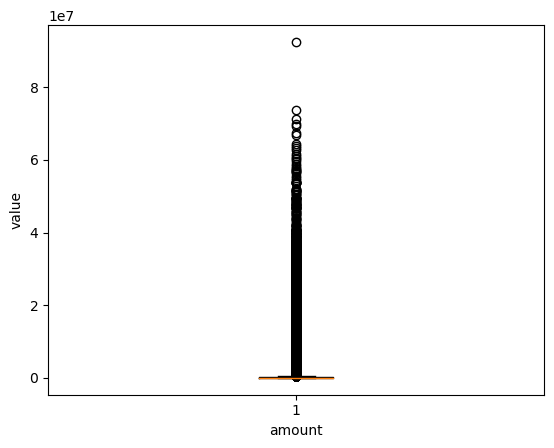

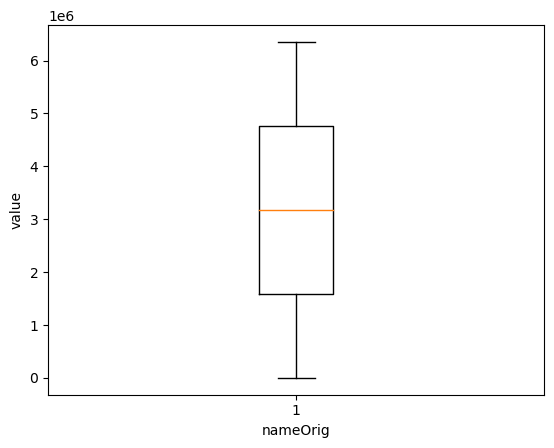

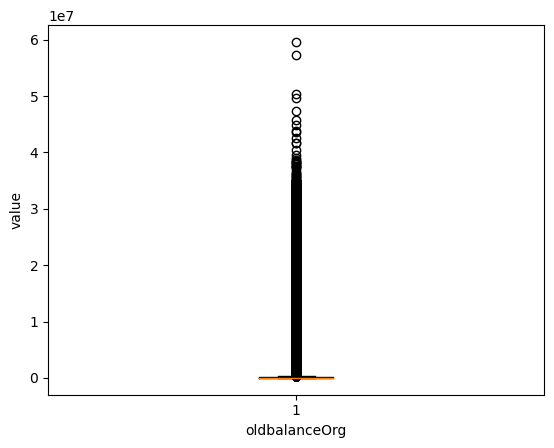

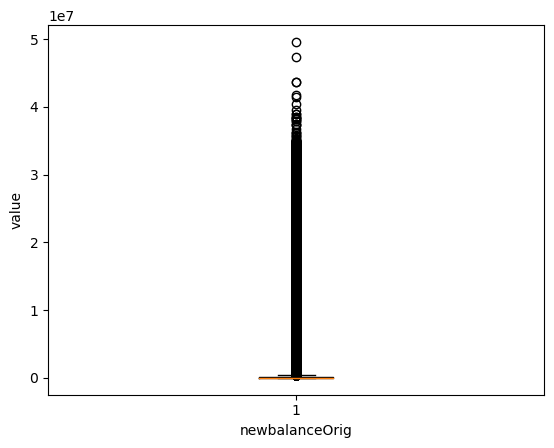

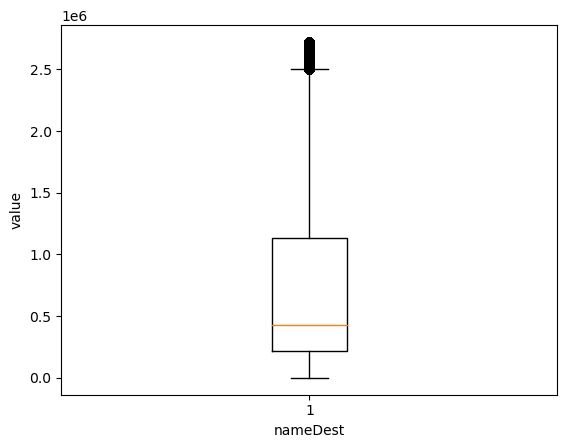

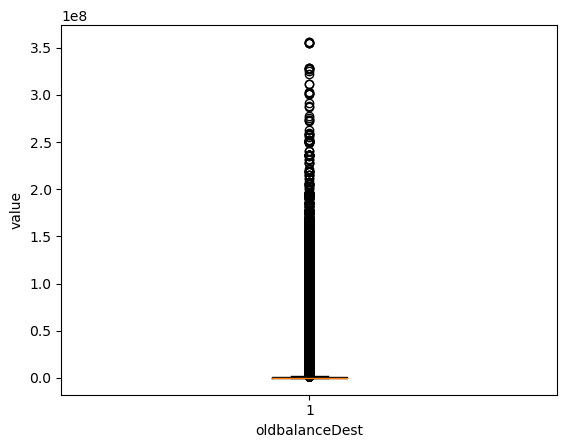

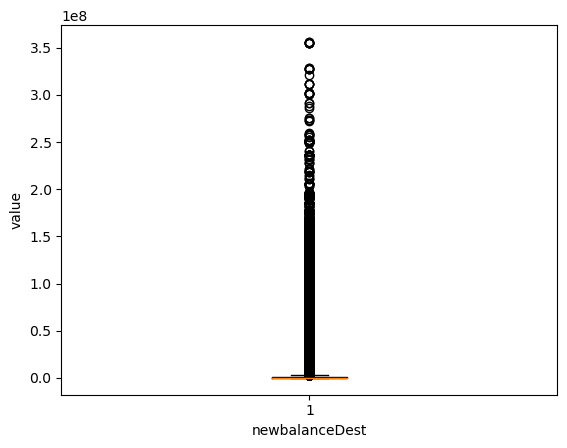

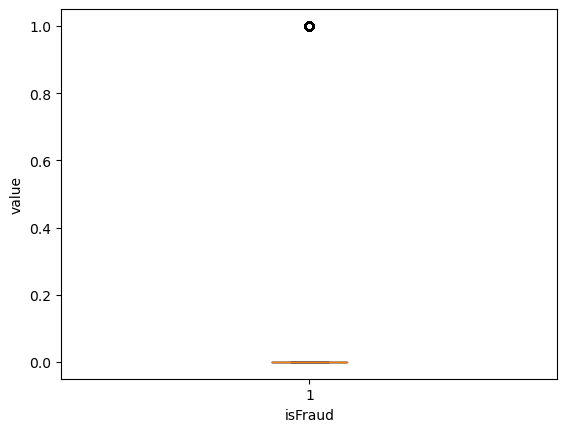

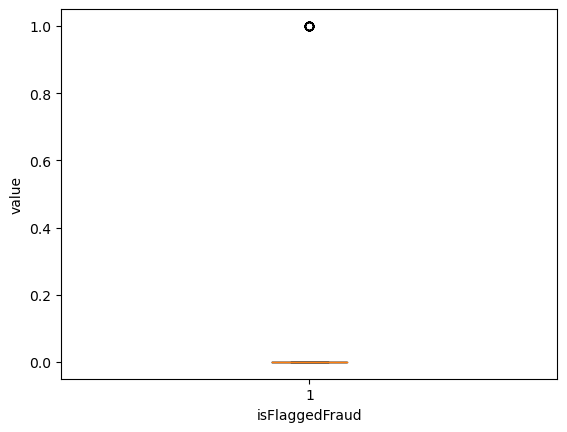

In [12]:
for o in df.columns:
    plt.boxplot(df[o])
    plt.xlabel(o)
    plt.ylabel('value')
    plt.show()

## Correlation :

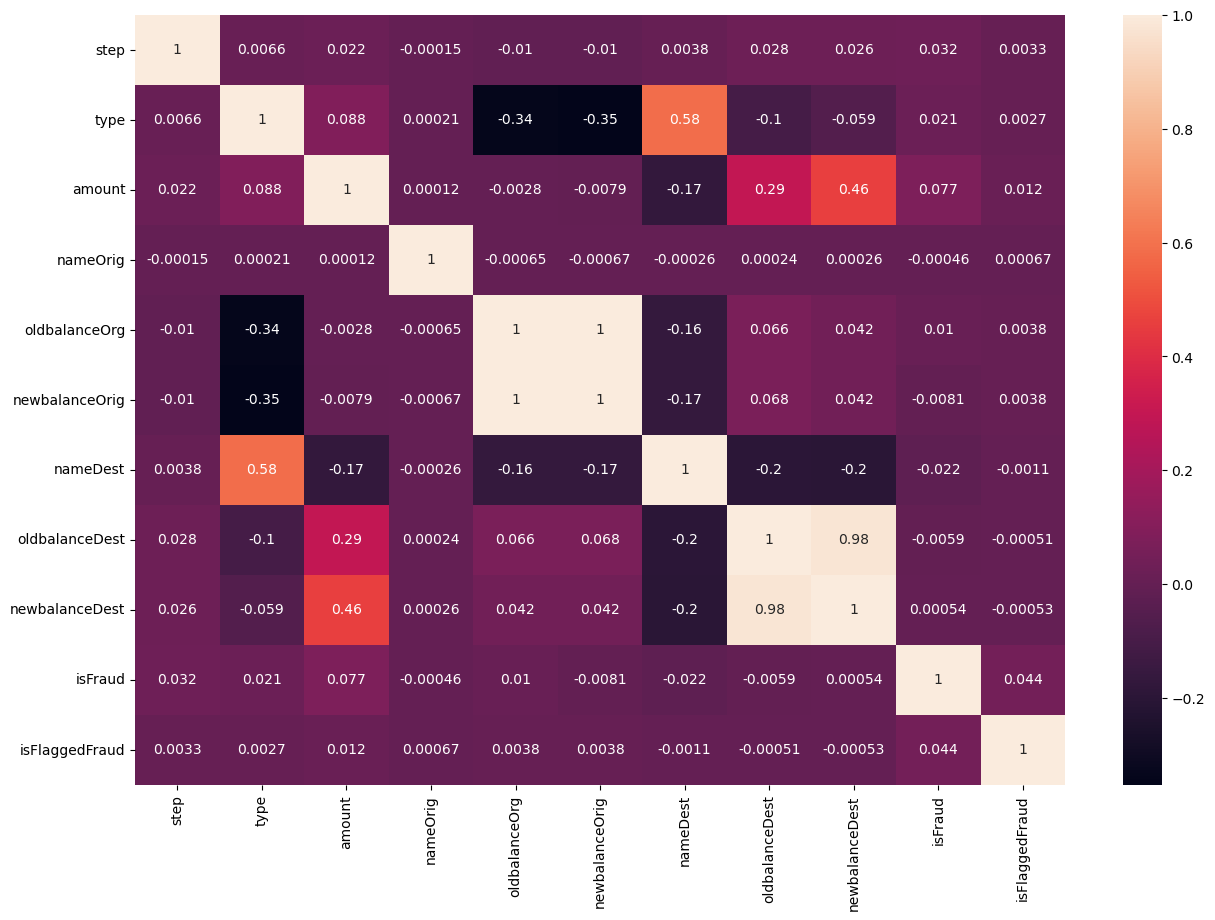

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Dividing Data (X,Y) :

In [14]:
X1 = df.drop(['isFraud'],axis=1)
Y1 = df['isFraud']

## Balancing the class

In [15]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [16]:
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import NearMiss

In [17]:
nm = NearMiss()
X,Y = nm.fit_resample(X1,Y1)
X.shape,Y.shape

((16426, 10), (16426,))

In [18]:
print('Before resampling : {}'.format(Counter(Y1)))
print('After resampling : {}'.format(Counter(Y)))

Before resampling : Counter({0: 6354407, 1: 8213})
After resampling : Counter({0: 8213, 1: 8213})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


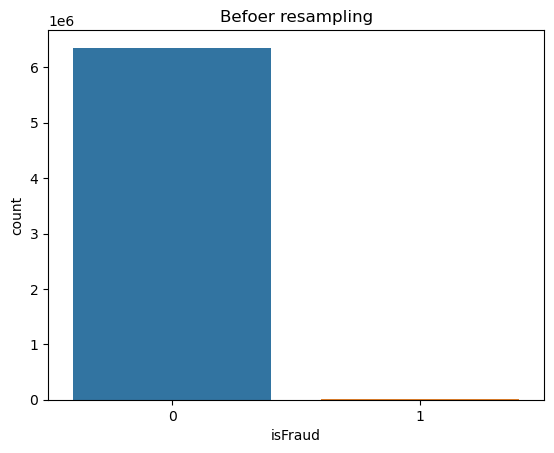

In [19]:
sns.countplot(Y1)
plt.title('Befoer resampling')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


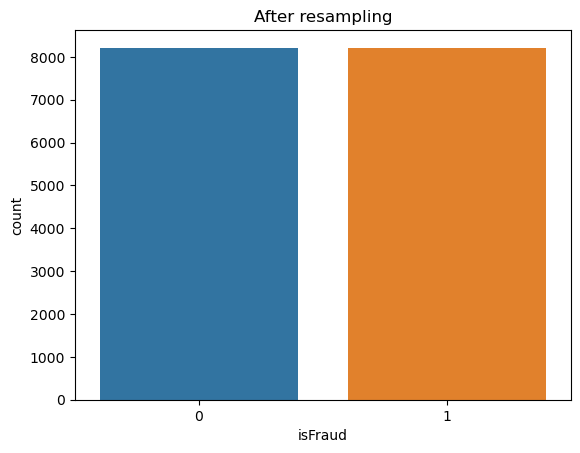

In [20]:
sns.countplot(Y)
plt.title('After resampling')
plt.show()

## Train Test Split :

In [21]:
from sklearn.model_selection import train_test_split
std = StandardScaler()
X = std.fit_transform(X)
X

array([[-0.55159612, -0.59080995, -0.39553162, ..., -0.114953  ,
        -0.22426483, -0.03122523],
       [-0.80535137, -0.59080995, -0.39794274, ..., -0.114953  ,
        -0.22583657, -0.03122523],
       [ 1.22986935,  1.54051747, -0.39691881, ..., -0.114953  ,
        -0.2251691 , -0.03122523],
       ...,
       [ 2.25006905, -0.59080995,  3.01300735, ..., -0.08611088,
         2.02181374, -0.03122523],
       [ 2.25006905,  1.54051747,  0.05790589, ..., -0.114953  ,
        -0.22849456, -0.03122523],
       [ 2.25006905, -0.59080995,  0.05790589, ...,  2.62658983,
         2.36754969, -0.03122523]])

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11498, 10), (4928, 10), (11498,), (4928,))

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

# LogisticRegression :

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pre=log.predict(x_test)
y_pre

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
log.score(x_test,y_test)

0.9375

In [27]:
log.score(x_train,y_train)

0.9387719603409289

## Performing Matrix :

In [28]:
con = confusion_matrix(y_test,y_pre)

<AxesSubplot:>

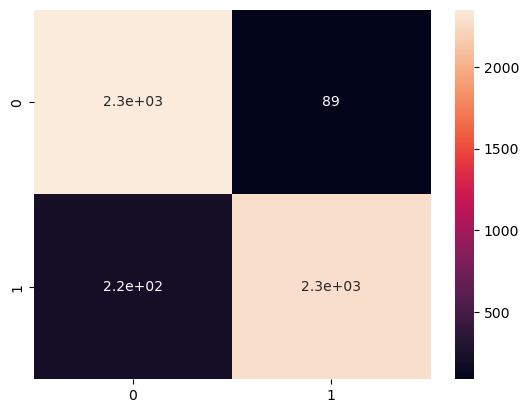

In [29]:
sns.heatmap(con,annot=True)

In [30]:
acc = accuracy_score(y_test,y_pre)
print('The accuracy score is = ',acc)

The accuracy score is =  0.9375


In [31]:
cla = classification_report(y_test,y_pre)
print(cla)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2438
           1       0.96      0.91      0.94      2490

    accuracy                           0.94      4928
   macro avg       0.94      0.94      0.94      4928
weighted avg       0.94      0.94      0.94      4928



# DecisionTreeClassifier :

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=12)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=12)

In [33]:
y_pre_dt = dt.predict(x_test)
y_pre_dt

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
dt.score(x_test,y_test)

0.984375

In [35]:
dt.score(x_train,y_train)

1.0

## Performing Matrix :

In [36]:
con1 = confusion_matrix(y_test,y_pre_dt)

<AxesSubplot:>

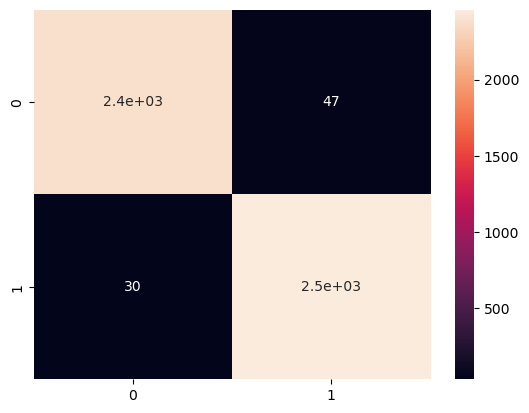

In [37]:
sns.heatmap(con1,annot=True)

In [38]:
acc1 = accuracy_score(y_test,y_pre_dt)
print('The accuracy score is = ',acc1)

The accuracy score is =  0.984375


In [39]:
cla1 = classification_report(y_test,y_pre_dt)
print(cla1)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2438
           1       0.98      0.99      0.98      2490

    accuracy                           0.98      4928
   macro avg       0.98      0.98      0.98      4928
weighted avg       0.98      0.98      0.98      4928



# RandomForestClassifier :

In [40]:
from sklearn.ensemble import RandomForestClassifier
n_list = [45,50,60,65,70,75,150,200,300,350]
for n in n_list:
    ran_r = RandomForestClassifier(n_estimators=n,random_state=0)
    ran_r.fit(x_train,y_train)
    print('n_estimators = ',n,' --> accurecy is = '+str(ran_r.score(x_test,y_test)))

n_estimators =  45  --> accurecy is = 0.9898538961038961
n_estimators =  50  --> accurecy is = 0.9900568181818182
n_estimators =  60  --> accurecy is = 0.9900568181818182
n_estimators =  65  --> accurecy is = 0.9902597402597403
n_estimators =  70  --> accurecy is = 0.9900568181818182
n_estimators =  75  --> accurecy is = 0.989650974025974
n_estimators =  150  --> accurecy is = 0.9892451298701299
n_estimators =  200  --> accurecy is = 0.9888392857142857
n_estimators =  300  --> accurecy is = 0.989650974025974
n_estimators =  350  --> accurecy is = 0.989650974025974


In [41]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=65,random_state=0)
ran.fit(x_train,y_train)

RandomForestClassifier(n_estimators=65, random_state=0)

In [42]:
y_pre_ran = ran.predict(x_test)
y_pre_ran

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
ran.score(x_test,y_test)

0.9902597402597403

In [44]:
ran.score(x_train,y_train)

1.0

## Performing Matrix :

In [45]:
con2 = confusion_matrix(y_test,y_pre_ran)

<AxesSubplot:>

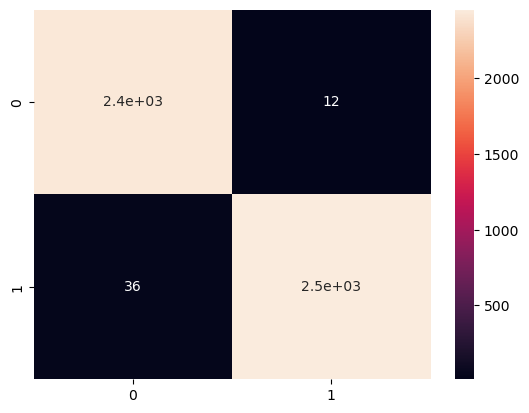

In [46]:
sns.heatmap(con2,annot=True)

In [47]:
acc2 = accuracy_score(y_test,y_pre_ran)
print('The accuracy score is = ',acc2)

The accuracy score is =  0.9902597402597403


In [48]:
cla2 = classification_report(y_test,y_pre_ran)
print(cla2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2438
           1       1.00      0.99      0.99      2490

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



# SVM :
## RBF :

In [49]:
from sklearn.svm import SVC
s1 = SVC()
s1.fit(x_train,y_train)

SVC()

In [50]:
y_pre_s1 = s1.predict(x_test)
y_pre_s1

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [51]:
s1.score(x_test,y_test)

0.9381087662337663

In [52]:
s1.score(x_train,y_train)

0.9359888676291529

## Performing Matrix :

In [53]:
con3 = confusion_matrix(y_test,y_pre_s1)

<AxesSubplot:>

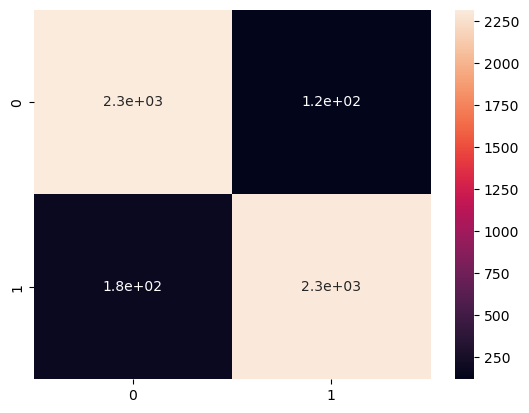

In [54]:
sns.heatmap(con3,annot=True)

In [55]:
acc3 = accuracy_score(y_test,y_pre_s1)
print('The accuracy score is = ',acc3)

The accuracy score is =  0.9381087662337663


In [56]:
cla3 = classification_report(y_test,y_pre_s1)
print(cla3)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2438
           1       0.95      0.93      0.94      2490

    accuracy                           0.94      4928
   macro avg       0.94      0.94      0.94      4928
weighted avg       0.94      0.94      0.94      4928



## Poly :

In [57]:
lis = [1,2,3,4,5,6]
for i in lis:
    pol = SVC(kernel='poly',degree=i)
    pol.fit(x_train,y_train)
    print('degree = ',i)
    print('accuracy = ',pol.score(x_test,y_test))

degree =  1
accuracy =  0.9332386363636364
degree =  2
accuracy =  0.877435064935065
degree =  3
accuracy =  0.8695211038961039
degree =  4
accuracy =  0.8392857142857143
degree =  5
accuracy =  0.8301542207792207
degree =  6
accuracy =  0.7867288961038961


In [58]:
s2 = SVC(kernel='poly',degree=1)
s2.fit(x_train,y_train)

SVC(degree=1, kernel='poly')

In [59]:
y_pre_s2 = s2.predict(x_test)
y_pre_s2

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [60]:
s2.score(x_test,y_test)

0.9332386363636364

In [61]:
s2.score(x_train,y_train)

0.930770568794573

## Performing Matrix :

In [62]:
con4 = confusion_matrix(y_test,y_pre_s2)

<AxesSubplot:>

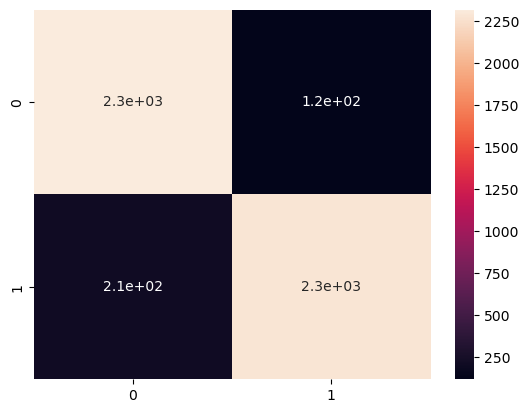

In [63]:
sns.heatmap(con4,annot=True)

In [64]:
acc4 = accuracy_score(y_test,y_pre_s2)
print('The accuracy score is = ',acc4)

The accuracy score is =  0.9332386363636364


In [65]:
cla4 = classification_report(y_test,y_pre_s2)
print(cla4)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2438
           1       0.95      0.92      0.93      2490

    accuracy                           0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928



## Linear :

In [66]:
s3 = SVC(kernel='linear')
s3.fit(x_train,y_train)

SVC(kernel='linear')

In [67]:
y_pre_s3 = s3.predict(x_test)
y_pre_s3

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [68]:
s3.score(x_test,y_test)

0.948051948051948

In [69]:
s3.score(x_train,y_train)

0.9456427204731258

## Performing Matrix :

In [70]:
con5 = confusion_matrix(y_test,y_pre_s3)

<AxesSubplot:>

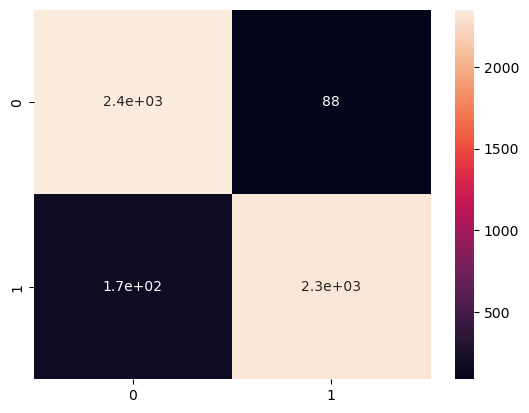

In [71]:
sns.heatmap(con5,annot=True)

In [72]:
acc5 = accuracy_score(y_test,y_pre_s3)
print('The accuracy score is = ',acc5)

The accuracy score is =  0.948051948051948


In [73]:
cla5 = classification_report(y_test,y_pre_s3)
print(cla5)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2438
           1       0.96      0.93      0.95      2490

    accuracy                           0.95      4928
   macro avg       0.95      0.95      0.95      4928
weighted avg       0.95      0.95      0.95      4928



## Sigmoid : 

In [74]:
s4 = SVC(kernel='sigmoid')
s4.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [75]:
y_pre_s4 = s4.predict(x_test)
y_pre_s4

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [76]:
s4.score(x_test,y_test)

0.8114853896103896

In [77]:
s4.score(x_train,y_train)

0.8144894764306836

## Performing Matrix :

In [78]:
con6 = confusion_matrix(y_test,y_pre_s4)

<AxesSubplot:>

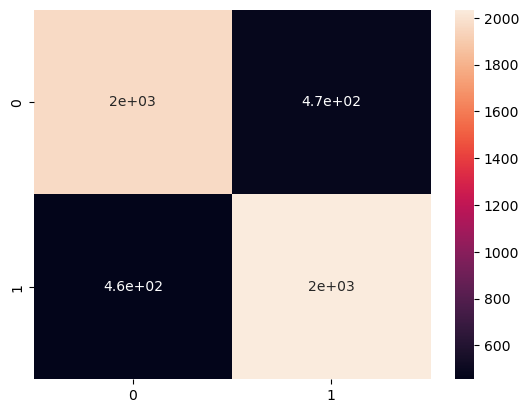

In [79]:
sns.heatmap(con6,annot=True)

In [80]:
acc6 = accuracy_score(y_test,y_pre_s4)
print('The accuracy score is = '+str(acc6))

The accuracy score is = 0.8114853896103896


In [81]:
cla6 = classification_report(y_test,y_pre_s4)
print(cla6)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2438
           1       0.81      0.82      0.81      2490

    accuracy                           0.81      4928
   macro avg       0.81      0.81      0.81      4928
weighted avg       0.81      0.81      0.81      4928



# KNN :

In [82]:
from sklearn.neighbors import KNeighborsClassifier
for c in range(2,7):
    kn = KNeighborsClassifier(n_neighbors=c,)
    kn.fit(x_train,y_train)
    print('n_neighbors = ',c,' accuracy = '+str(kn.score(x_test,y_test)))
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


n_neighbors =  2  accuracy = 0.8938717532467533


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


n_neighbors =  3  accuracy = 0.9117288961038961


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


n_neighbors =  4  accuracy = 0.8975243506493507


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


n_neighbors =  5  accuracy = 0.9099025974025974


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


n_neighbors =  6  accuracy = 0.903814935064935


In [83]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pre_knn = knn.predict(x_test)
y_pre_knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
knn.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9117288961038961

In [86]:
knn.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9414680814054618

## Performing Matrix :

In [87]:
con7 = confusion_matrix(y_test,y_pre_knn)

<AxesSubplot:>

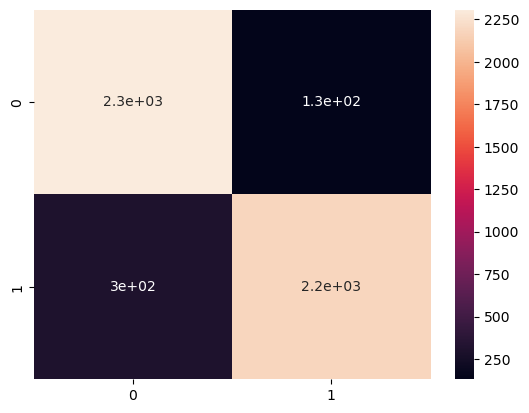

In [88]:
sns.heatmap(con7,annot=True)

In [89]:
acc7 = accuracy_score(y_test,y_pre_knn)
print('The accuracy score is = ',acc7)

The accuracy score is =  0.9117288961038961


In [90]:
cla7 = classification_report(y_test,y_pre_knn)
print(cla7)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2438
           1       0.94      0.88      0.91      2490

    accuracy                           0.91      4928
   macro avg       0.91      0.91      0.91      4928
weighted avg       0.91      0.91      0.91      4928



# Naive Bayes :

In [91]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [92]:
y_pre_nb = nb.predict(x_test)
y_pre_nb

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [93]:
nb.score(x_test,y_test)

0.9247159090909091

In [94]:
nb.score(x_train,y_train)

0.92546529831275

## Performing Matrix :

In [95]:
con8 = confusion_matrix(y_test,y_pre_nb)

<AxesSubplot:>

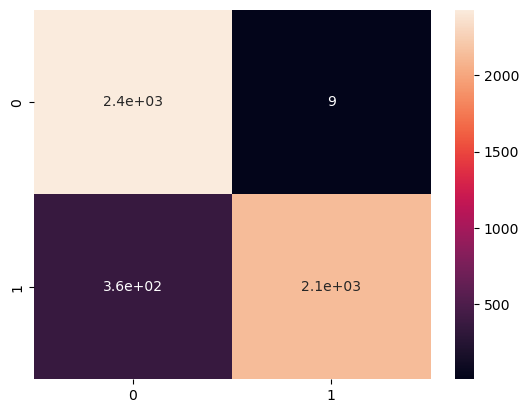

In [96]:
sns.heatmap(con8,annot=True)

In [97]:
acc8 = accuracy_score(y_test,y_pre_nb)
print('The accuracy score is = ',acc8)

The accuracy score is =  0.9247159090909091


In [98]:
cla8 = classification_report(y_test,y_pre_nb)
print(cla8)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2438
           1       1.00      0.85      0.92      2490

    accuracy                           0.92      4928
   macro avg       0.93      0.93      0.92      4928
weighted avg       0.93      0.92      0.92      4928



# Ensemble Techniques :
# VotingClassifier :

In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
est1 = [('ran',ran),('dt',dt),('ran1',RandomForestClassifier(n_estimators=50,random_state=0))]
est2 = [('ran',ran),('ran1',RandomForestClassifier(n_estimators=50,random_state=0)),('ran2',RandomForestClassifier(n_estimators=60,random_state=0)),('ran3',RandomForestClassifier(n_estimators=70,random_state=0))]
e_list = [est1,est2]

In [101]:
for z in e_list:
    vot = VotingClassifier(estimators=z)
    vot.fit(x_train,y_train)
    print('using = ',z,' accuracy = '+str(vot.score(x_test,y_test)))

using =  [('ran', RandomForestClassifier(n_estimators=65, random_state=0)), ('dt', DecisionTreeClassifier(random_state=12)), ('ran1', RandomForestClassifier(n_estimators=50, random_state=0))]  accuracy = 0.9900568181818182
using =  [('ran', RandomForestClassifier(n_estimators=65, random_state=0)), ('ran1', RandomForestClassifier(n_estimators=50, random_state=0)), ('ran2', RandomForestClassifier(n_estimators=60, random_state=0)), ('ran3', RandomForestClassifier(n_estimators=70, random_state=0))]  accuracy = 0.9904626623376623


In [102]:
vc = VotingClassifier(estimators=est2)
vc.fit(x_train,y_train)
y_pre_vc = vc.predict(x_test)
y_pre_vc

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [103]:
vc.score(x_test,y_test)

0.9904626623376623

In [104]:
vc.score(x_train,y_train)

1.0

## Performing Matrix :

In [105]:
con9 = confusion_matrix(y_test,y_pre_vc)

<AxesSubplot:>

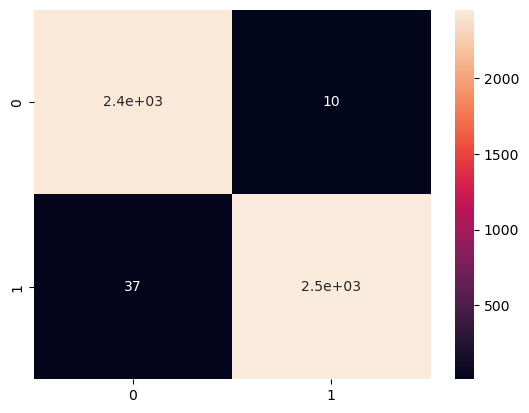

In [106]:
sns.heatmap(con9,annot=True)

In [107]:
acc9 = accuracy_score(y_test,y_pre_vc)
print('The accuracy score is = ',acc9)

The accuracy score is =  0.9904626623376623


In [108]:
cla9 = classification_report(y_test,y_pre_vc)
print(cla9)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2438
           1       1.00      0.99      0.99      2490

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



# BaggingClassifier :

In [109]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=ran,random_state=7)
bag.fit(x_train,y_train)


BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=65,
                                                        random_state=0),
                  random_state=7)

In [110]:
y_pre_bag=bag.predict(x_test)
y_pre_bag

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [111]:
bag.score(x_test,y_test)

0.9882305194805194

In [112]:
bag.score(x_train,y_train)

0.9964341624630371

## Performing Matrix :

In [113]:
con10 = confusion_matrix(y_test,y_pre_bag)

<AxesSubplot:>

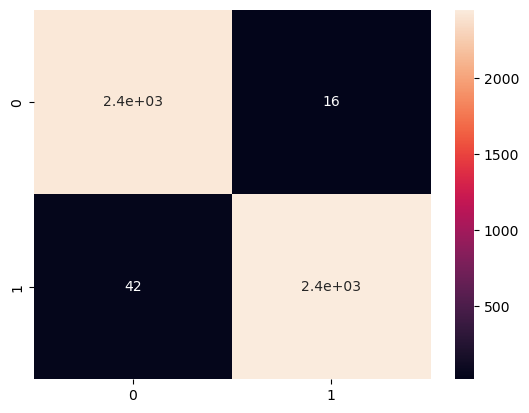

In [114]:
sns.heatmap(con10,annot=True)

In [115]:
acc10 = accuracy_score(y_test,y_pre_bag)
print('The accuracy score is = ',acc10)

The accuracy score is =  0.9882305194805194


In [116]:
cla10 = classification_report(y_test,y_pre_bag)
print(cla10)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2438
           1       0.99      0.98      0.99      2490

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



# Boosting :
# AdaBoostClassifier :

In [117]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(base_estimator=ran,random_state=0)
ada1.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=65,
                                                         random_state=0),
                   random_state=0)

In [118]:
y_pre_ada1 = ada1.predict(x_test)
y_pre_ada1

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [119]:
ada1.score(x_test,y_test)

0.989650974025974

In [120]:
ada1.score(x_train,y_train)

1.0

## Performing Matrix :

In [121]:
con11 = confusion_matrix(y_test,y_pre_ada1)

<AxesSubplot:>

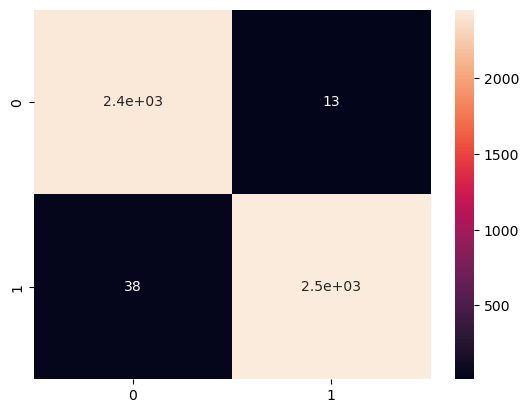

In [122]:
sns.heatmap(con11,annot=True)

In [123]:
acc11 = accuracy_score(y_test,y_pre_ada1)
print('The accuracy score is = ',acc11)

The accuracy score is =  0.989650974025974


In [124]:
cla11 = classification_report(y_test,y_pre_ada1)
print(cla11)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2438
           1       0.99      0.98      0.99      2490

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



# GradientBoostingClassifier :

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=78)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=78)

In [126]:
y_pre_gb=gb.predict(x_test)
y_pre_gb

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [127]:
gb.score(x_test,y_test)

0.9878246753246753

In [128]:
gb.score(x_train,y_train)

0.9898243172725691

## Performing Matrix :

In [129]:
con12 = confusion_matrix(y_test,y_pre_gb)

<AxesSubplot:>

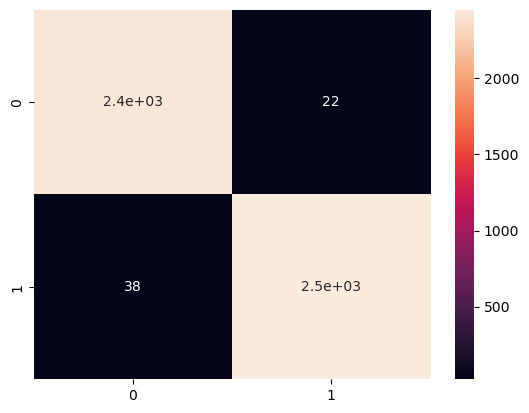

In [130]:
sns.heatmap(con12,annot=True)

In [131]:
acc12 = accuracy_score(y_test,y_pre_gb)
print('The accuracy score is = ',acc12)

The accuracy score is =  0.9878246753246753


In [132]:
cla12 = classification_report(y_test,y_pre_gb)
print(cla12)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2438
           1       0.99      0.98      0.99      2490

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



# XG Boost :

In [133]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [134]:
import xgboost as xg
from xgboost import XGBClassifier

In [135]:
xgc = XGBClassifier(random_state=52,n_estimators=200)
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=52, ...)

In [136]:
y_pre_xg = xgc.predict(x_test)
y_pre_xg

array([1, 1, 0, ..., 1, 0, 0])

In [137]:
xgc.score(x_test,y_test)

0.992288961038961

In [138]:
xgc.score(x_train,y_train)

1.0

## Performing Matrix :

In [139]:
con13 = confusion_matrix(y_test,y_pre_xg)

<AxesSubplot:>

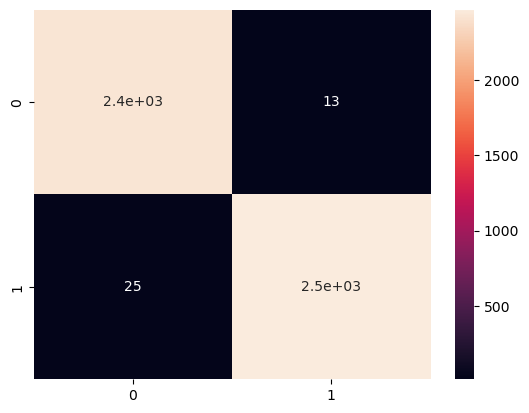

In [140]:
sns.heatmap(con13,annot=True)

In [141]:
acc13 = accuracy_score(y_test,y_pre_xg)
print('The accuracy score is = ',acc13)

The accuracy score is =  0.992288961038961


In [142]:
cla13 = classification_report(y_test,y_pre_xg)
print(cla13)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2438
           1       0.99      0.99      0.99      2490

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



# ROC Curve :

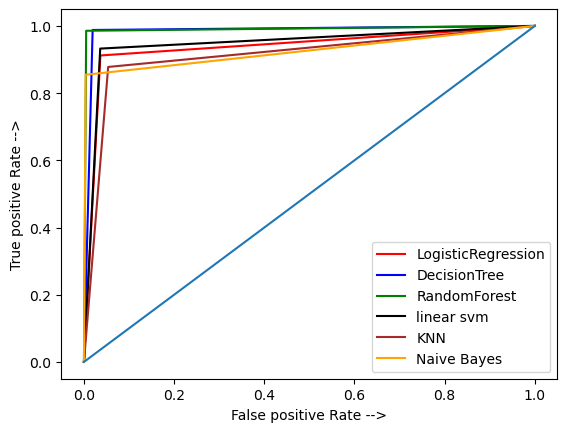

In [143]:
l_fp,l_tp,l_th=roc_curve(y_test,y_pre)
dt_fp,dt_tp,dt_th=roc_curve(y_test,y_pre_dt)
ran_fp,ran_tp,ran_th=roc_curve(y_test,y_pre_ran)
s3_fp,s3_tp,s3_th=roc_curve(y_test,y_pre_s3)
k_fp,k_tp,k_th=roc_curve(y_test,y_pre_knn)
nb_fp,nb_tp,nb_th=roc_curve(y_test,y_pre_nb)
vc_fp,vc_tp,vc_th=roc_curve(y_test,y_pre_vc)
bag_fp,bag_tp,bad_th=roc_curve(y_test,y_pre_bag)
xg_fp,xg_fp,xg_th=roc_curve(y_test,y_pre_xg)

plt.plot(l_fp,l_tp,c='red',label='LogisticRegression')
plt.plot(dt_fp,dt_tp,c='blue',label='DecisionTree')
plt.plot(ran_fp,ran_tp,c='green',label='RandomForest')
plt.plot(s3_fp,s3_tp,c='black',label='linear svm')
plt.plot(k_fp,k_tp,c='brown',label='KNN')
plt.plot(nb_fp,nb_tp,c='orange',label='Naive Bayes')
plt.plot([0,1])

plt.xlabel('False positive Rate -->')
plt.ylabel('True positive Rate -->')
plt.legend()
plt.show()

In [144]:
new_df = pd.DataFrame({'name':['LogisticRegression','DecisionTree','RandomForest','linear svm','KNN','Naive Bayes','Voting','Bagging','XG Boost'],
                    'Accuracy':[acc,acc1,acc2,acc5,acc6,acc8,acc9,acc10,acc13]})
new_df

,name,Accuracy
0,LogisticRegression,0.937500
1,DecisionTree,0.984375
2,RandomForest,0.990260
3,linear svm,0.948052
4,KNN,0.811485
5,Naive Bayes,0.924716
6,Voting,0.990463
7,Bagging,0.988231
8,XG Boost,0.992289


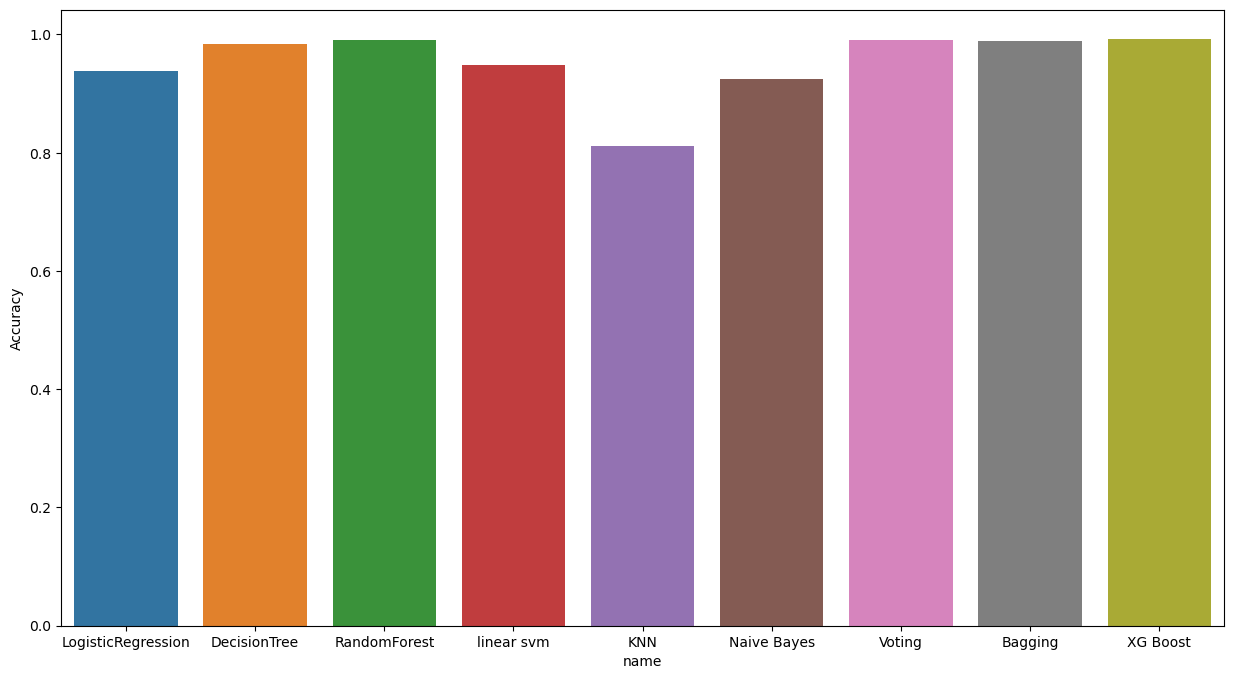

In [145]:
plt.figure(figsize=(15,8))
sns.barplot(x=new_df['name'],y=new_df['Accuracy'])
plt.show()